# primeira metrica

In [79]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

#### puxando o arquivo para aplicar as alteracoes

In [ ]:
df = pl.scan_parquet("C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.basics_POLARS.parquet")

display(df.collect())

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i64,str,i64,str
"""tt0000001""","""short""","""Carmencita""","""Carmencita""",0,1894,null,1,"""Documentary,Short"""
"""tt0000002""","""short""","""Le clown et ses chiens""","""Le clown et ses chiens""",0,1892,null,5,"""Animation,Short"""
"""tt0000003""","""short""","""Poor Pierrot""","""Pauvre Pierrot""",0,1892,null,5,"""Animation,Comedy,Romance"""
"""tt0000004""","""short""","""Un bon bock""","""Un bon bock""",0,1892,null,12,"""Animation,Short"""
"""tt0000005""","""short""","""Blacksmith Scene""","""Blacksmith Scene""",0,1893,null,1,"""Short"""
…,…,…,…,…,…,…,…,…
"""tt9916848""","""tvEpisode""","""Episode #3.17""","""Episode #3.17""",0,2009,null,null,"""Drama"""
"""tt9916850""","""tvEpisode""","""Episode #3.19""","""Episode #3.19""",0,2010,null,null,"""Drama"""
"""tt9916852""","""tvEpisode""","""Episode #3.20""","""Episode #3.20""",0,2010,null,null,"""Drama"""


#### definindo que somente serao analisados filmes

In [59]:
movies = df.filter(pl.col("titleType") == "movie")
display(movies.collect())

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i64,str,i64,str
"""tt0000009""","""movie""","""Miss Jerry""","""Miss Jerry""",0,1894,null,45,"""Romance"""
"""tt0000147""","""movie""","""The Corbett-Fitzsimmons Fight""","""The Corbett-Fitzsimmons Fight""",0,1897,null,100,"""Documentary,News,Sport"""
"""tt0000335""","""movie""","""Soldiers of the Cross""","""Soldiers of the Cross""",0,1900,null,40,"""Biography,Drama"""
"""tt0000502""","""movie""","""Bohemios""","""Bohemios""",0,1905,null,100,null
"""tt0000574""","""movie""","""The Story of the Kelly Gang""","""The Story of the Kelly Gang""",0,1906,null,70,"""Action,Adventure,Biography"""
…,…,…,…,…,…,…,…,…
"""tt9916622""","""movie""","""Rodolpho Teóphilo - O Legado d…","""Rodolpho Teóphilo - O Legado d…",0,2015,null,57,"""Documentary"""
"""tt9916680""","""movie""","""De la ilusión al desconcierto:…","""De la ilusión al desconcierto:…",0,2007,null,100,"""Documentary"""
"""tt9916706""","""movie""","""Dankyavar Danka""","""Dankyavar Danka""",0,2013,null,null,"""Comedy"""


#### definindo filtros para determinar o tempo de duracao minimo 
#### apartir de que ano comeca ou termina

In [73]:
movies = (
    movies
    .with_columns([
        pl.col("startYear").cast(pl.Int32, strict=False),
        pl.col("runtimeMinutes").cast(pl.Int32, strict=False),
    ])
    .filter(
        (pl.col("startYear").is_not_null()) &
        (pl.col("runtimeMinutes").is_not_null()) &
        (pl.col("startYear") >= 2016) &
        (pl.col("startYear") <= 2026)
    )
)

display(movies.collect())

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i32,str,i32,str
"""tt0277124""","""movie""","""Les mains au dos""","""Les mains au dos""",0,2016,null,48,null
"""tt0308078""","""movie""","""Les bâtisseurs""","""Les bâtisseurs""",0,2016,null,48,"""Documentary"""
"""tt0315642""","""movie""","""Wazir""","""Wazir""",0,2016,null,103,"""Action,Crime,Drama"""
"""tt0337926""","""movie""","""Chatô - The King of Brazil""","""Chatô: O Rei do Brasil""",0,2016,null,102,"""Biography,Drama"""
"""tt0364201""","""movie""","""Aman Ke Farishtey""","""Aman Ke Farishtey""",0,2016,null,137,"""Action"""
…,…,…,…,…,…,…,…,…
"""tt9212674""","""movie""","""The Great Patriot""","""The Great Patriot""",0,2026,null,109,"""Action,Biography,Drama"""
"""tt9371598""","""movie""","""This Time Next Year I'll Be Fa…","""This Time Next Year I'll Be Fa…",0,2026,null,95,"""Comedy,Drama,Romance"""
"""tt9390520""","""movie""","""Révolutionnaire""","""Révolutionnaire""",0,2026,null,115,"""Action"""


#### definindo uma ordem(crescente) para ler os filmes

In [74]:
movies = movies.sort("startYear")
display(movies.collect())

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i32,str,i32,str
"""tt0277124""","""movie""","""Les mains au dos""","""Les mains au dos""",0,2016,null,48,null
"""tt0308078""","""movie""","""Les bâtisseurs""","""Les bâtisseurs""",0,2016,null,48,"""Documentary"""
"""tt0315642""","""movie""","""Wazir""","""Wazir""",0,2016,null,103,"""Action,Crime,Drama"""
"""tt0337926""","""movie""","""Chatô - The King of Brazil""","""Chatô: O Rei do Brasil""",0,2016,null,102,"""Biography,Drama"""
"""tt0364201""","""movie""","""Aman Ke Farishtey""","""Aman Ke Farishtey""",0,2016,null,137,"""Action"""
…,…,…,…,…,…,…,…,…
"""tt9212674""","""movie""","""The Great Patriot""","""The Great Patriot""",0,2026,null,109,"""Action,Biography,Drama"""
"""tt9371598""","""movie""","""This Time Next Year I'll Be Fa…","""This Time Next Year I'll Be Fa…",0,2026,null,95,"""Comedy,Drama,Romance"""
"""tt9390520""","""movie""","""Révolutionnaire""","""Révolutionnaire""",0,2026,null,115,"""Action"""


#### tirando a media, mediana e expondo o numero de filmes

In [75]:
movies_by_year = (
    movies
    .group_by("startYear")
    .agg([
        pl.col("runtimeMinutes").mean().alias("mean_runtime"),
        pl.col("runtimeMinutes").median().alias("median_runtime"),
        pl.count().alias("num_movies"),
    ])
    .sort("startYear")
)
display(movies_by_year.collect())

C:\Users\leonardo.ferraz\AppData\Local\Temp\ipykernel_19664\879171491.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("num_movies"),


startYear,mean_runtime,median_runtime,num_movies
i32,f64,f64,u32
2016,88.963814,88.0,14619
2017,89.48447,89.0,15035
2018,90.319229,89.0,15149
2019,97.112861,90.0,15045
2020,90.984137,87.0,12482
…,…,…,…
2022,91.399894,90.0,15119
2023,91.467286,90.0,15391
2024,92.129331,90.0,15240


#### coletando as alteracoes e mostrando num grafico

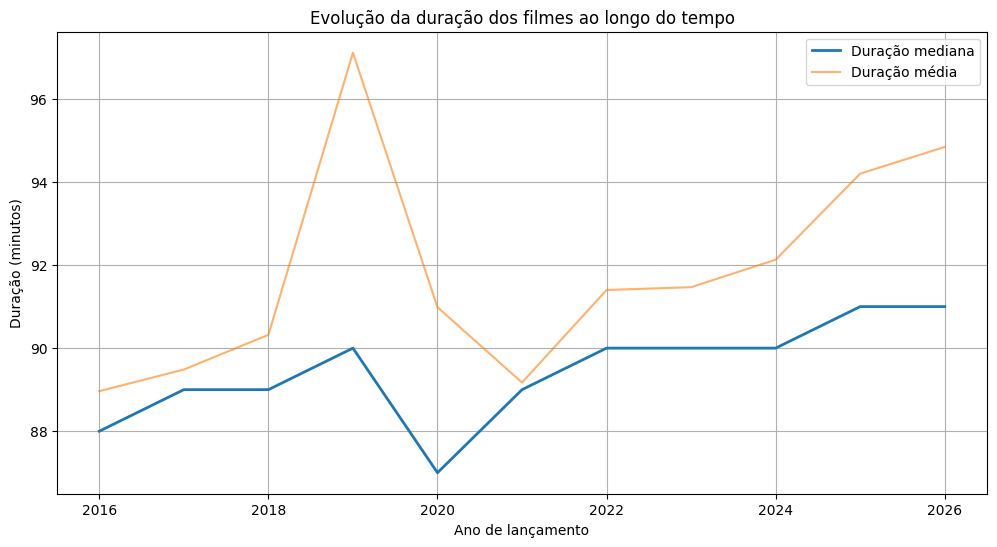

In [76]:
movies_by_year_df = movies_by_year.collect()


years = movies_by_year_df["startYear"].to_numpy()
median_runtime = movies_by_year_df["median_runtime"].to_numpy()
mean_runtime = movies_by_year_df["mean_runtime"].to_numpy()

plt.figure(figsize=(12, 6))

plt.plot(
    years,
    median_runtime,
    label="Duração mediana",
    linewidth=2
)

plt.plot(
    years,
    mean_runtime,
    label="Duração média",
    alpha=0.6
)

plt.xlabel("Ano de lançamento")
plt.ylabel("Duração (minutos)")
plt.title("Evolução da duração dos filmes ao longo do tempo")
plt.legend()
plt.grid(True)
plt.show()


# segunda metrica(dispercao)

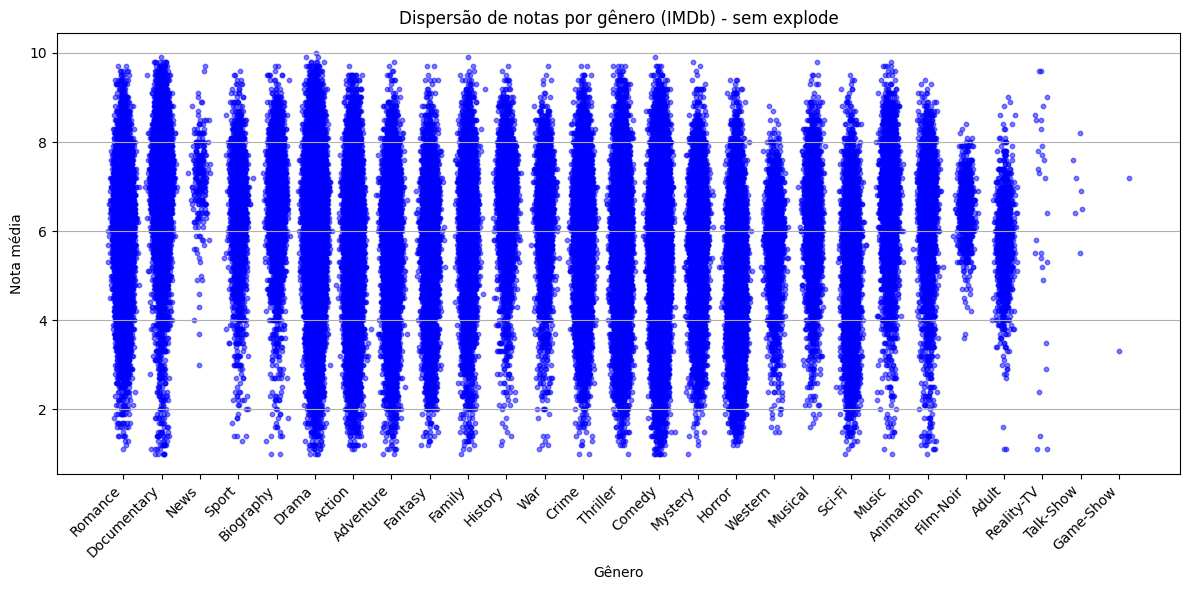

In [89]:


# --- Carregando dados do IMDb em Parquet ---
titles = pl.read_parquet("C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.basics_POLARS.parquet")
ratings = pl.read_parquet("C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.ratings_POLARS.parquet")

# --- Filtrando apenas filmes ---
movies = titles.filter(pl.col("titleType") == "movie")

# --- Juntando com ratings ---
movies_ratings = movies.join(ratings, on="tconst")

# --- Filtrando dados plausíveis ---
movies_ratings = movies_ratings.filter(
    (pl.col("averageRating") > 0) & (pl.col("numVotes") > 50)
)

# --- Separar gêneros em listas ---
movies_ratings = movies_ratings.with_columns(
    pl.col("genres").str.split(",").alias("genres_list")
)

# --- Filtrar linhas com gênero válido (não nulo) ---
movies_ratings = movies_ratings.filter(pl.col("genres_list").is_not_null())

# --- Criar DataFrame "duplicado" sem explode ---
df_list = []
for row in movies_ratings.to_dicts():
    for g in row["genres_list"]:
        df_list.append({
            "tconst": row["tconst"],
            "title": row["primaryTitle"],
            "genre": g,
            "averageRating": row["averageRating"],
            "numVotes": row["numVotes"]
        })

# --- Converter para pandas ---
df = pl.DataFrame(df_list).to_pandas()

# --- Preparar mapeamento de gêneros para eixo x ---
genres = df['genre'].unique().tolist()
genre_to_x = {genre: i for i, genre in enumerate(genres)}

# --- Criar eixo x com jitter ---
x = df['genre'].map(genre_to_x).values
x_jitter = x + np.random.normal(0, 0.1, size=len(x))
y = df['averageRating'].values

# --- Scatter plot ---
plt.figure(figsize=(12, 6))
plt.scatter(x_jitter, y, alpha=0.5, s=10, color="blue")

plt.xticks(list(genre_to_x.values()), list(genre_to_x.keys()), rotation=45, ha="right")
plt.xlabel("Gênero")
plt.ylabel("Nota média")
plt.title("Dispersão de notas por gênero (IMDb) - sem explode")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


# extra

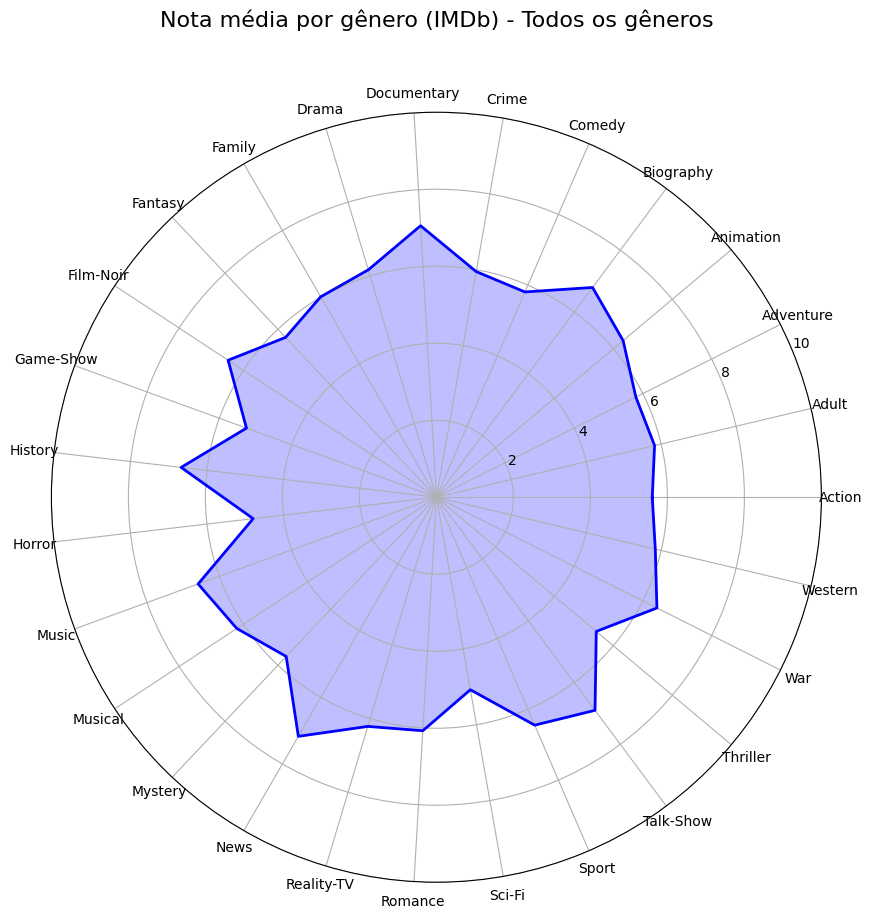

In [98]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Carregar dados ---
titles = pl.read_parquet("C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.basics_POLARS.parquet")
ratings = pl.read_parquet("C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.ratings_POLARS.parquet")

# --- Filtrar apenas filmes ---
movies = titles.filter(pl.col("titleType") == "movie")
movies_ratings = movies.join(ratings, on="tconst")

# --- Filtrar notas e votos plausíveis ---
movies_ratings = movies_ratings.filter(
    (pl.col("averageRating") > 0) & (pl.col("numVotes") > 50)
)

# --- Criar lista de gêneros ---
movies_ratings = movies_ratings.with_columns(
    pl.col("genres").str.split(",").alias("genres_list")
).filter(pl.col("genres_list").is_not_null())

# --- Converter para pandas ---
df = movies_ratings.to_pandas()

# --- Extrair todos os gêneros únicos ---
all_genres = sorted({g for sublist in df['genres_list'] for g in sublist})

# --- Calcular nota média por gênero ---
avg_ratings = []
for g in all_genres:
    df_genre = df[df['genres_list'].apply(lambda x: g in x)]
    avg_ratings.append(df_genre['averageRating'].mean())

# --- Preparar dados para radar chart ---
num_vars = len(all_genres)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fechar o círculo
avg_ratings += avg_ratings[:1]
angles += angles[:1]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.plot(angles, avg_ratings, color='blue', linewidth=2, linestyle='solid')
ax.fill(angles, avg_ratings, color='blue', alpha=0.25)

# Configurações do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(all_genres, fontsize=10)
ax.set_ylim(0, 10)
ax.set_title("Nota média por gênero (IMDb) - Todos os gêneros", size=16, y=1.1)

plt.show()
